1. Dataset (5 baris pertama):


,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


2. Kemunculan tiap negara:


,Country,Jumlah Kemunculan
0,Germany,2269
1,France,2109
2,EIRE,1620
3,Netherlands,634
4,Spain,539
5,Belgium,486
6,Switzerland,434
7,Portugal,367
8,Australia,356
9,Norway,239


3. Jumlah transaksi per negara:


,Country,Transaksi
0,Australia,44
1,Austria,12
2,Bahrain,1
3,Belgium,84
4,Brazil,1
5,Canada,3
6,Channel Islands,21
7,Cyprus,16
8,Czech Republic,2
9,Denmark,18


4. Hasil clustering (dengan kolom cluster):


,Country,Transaksi,Cluster
0,Australia,44,1
1,Austria,12,1
2,Bahrain,1,1
3,Belgium,84,1
4,Brazil,1,1
5,Canada,3,1
6,Channel Islands,21,1
7,Cyprus,16,1
8,Czech Republic,2,1
9,Denmark,18,1


5. Centroid setiap cluster:


,Cluster,Centroid
0,1,18.787879
1,2,360.500000
2,3,224.000000


6. Sorted centroid (rendah ke tinggi):


,Cluster,Centroid
0,1,18.787879
1,3,224.000000
2,2,360.500000


7. Negara dengan label cluster:


,Country,Transaksi,Label Cluster
0,Australia,44,Rendah
1,Austria,12,Rendah
2,Bahrain,1,Rendah
3,Belgium,84,Rendah
4,Brazil,1,Rendah
5,Canada,3,Rendah
6,Channel Islands,21,Rendah
7,Cyprus,16,Rendah
8,Czech Republic,2,Rendah
9,Denmark,18,Rendah


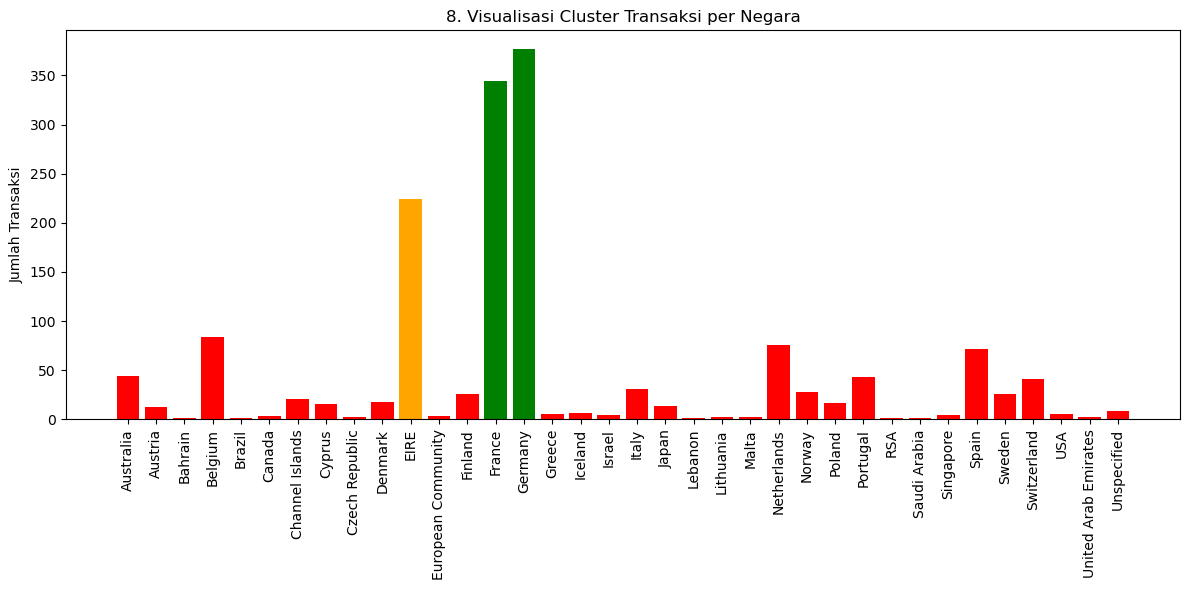

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
import numpy as np
from IPython.display import display  # Untuk memastikan display() bisa dipakai

# 1. Load dataset
df = pd.read_csv('transaction.csv')
print("1. Dataset (5 baris pertama):")
display(df.head())

# 2. Hitung kemunculan tiap negara
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Jumlah Kemunculan']
print("2. Kemunculan tiap negara:")
display(country_counts)

# 3. Hitung banyaknya transaksi tiap negara
transaksi_per_country = df.groupby('Country')['InvoiceNo'].nunique()
transaksi_df = transaksi_per_country.reset_index()
transaksi_df.columns = ['Country', 'Transaksi']
print("3. Jumlah transaksi per negara:")
display(transaksi_df)

# 4. Clustering menggunakan Average Linkage dengan k=3
X = transaksi_df[['Transaksi']].values
linkage_matrix = linkage(X, method='average')
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
transaksi_df['Cluster'] = clusters

print("4. Hasil clustering (dengan kolom cluster):")
display(transaksi_df)

# 5. Hitung centroid dari masing-masing cluster
centroids = transaksi_df.groupby('Cluster')['Transaksi'].mean().reset_index()
centroids.columns = ['Cluster', 'Centroid']
print("5. Centroid setiap cluster:")
display(centroids)

# 6. Urutkan centroid secara ascending
sorted_centroids = centroids.sort_values(by='Centroid').reset_index(drop=True)
print("6. Sorted centroid (rendah ke tinggi):")
display(sorted_centroids)

# 7. Labelkan cluster berdasarkan posisi centroid (rendah, sedang, tinggi)
cluster_map = {}
sorted_cluster_ids = sorted_centroids['Cluster'].tolist()
cluster_map[sorted_cluster_ids[0]] = 'Rendah'
cluster_map[sorted_cluster_ids[1]] = 'Sedang'
cluster_map[sorted_cluster_ids[2]] = 'Tinggi'
transaksi_df['Label Cluster'] = transaksi_df['Cluster'].map(cluster_map)

print("7. Negara dengan label cluster:")
display(transaksi_df[['Country', 'Transaksi', 'Label Cluster']])

# 8. Visualisasi
plt.figure(figsize=(12, 6))
color_map = {'Rendah': 'red', 'Sedang': 'orange', 'Tinggi': 'green'}

# Urutkan berdasarkan nama negara agar sumbu X konsisten
transaksi_df_sorted = transaksi_df.sort_values('Country').reset_index(drop=True)

plt.bar(x=range(len(transaksi_df_sorted)), 
        height=transaksi_df_sorted['Transaksi'], 
        color=transaksi_df_sorted['Label Cluster'].map(color_map))

plt.xticks(ticks=range(len(transaksi_df_sorted)), labels=transaksi_df_sorted['Country'], rotation=90)
plt.ylabel('Jumlah Transaksi')
plt.title('8. Visualisasi Cluster Transaksi per Negara')
plt.tight_layout()
plt.show()
